# Word usage by multiple artists

It obtains all lyrics for a given set of artists (parses HTML from www.metrolyrics.com) and returns a comparision of the words used by the artists.
Packages required: requests | re | time |

In [1]:
import sys
sys.path.insert(0, '../src')
from lyricsFunctions import *

In [2]:
listOfArtists = ['Eddie Vedder', 'Dire Straits', 'Ed Sheeran']
songs4Artists = getSongs4Artists(listOfArtists) #by default (location = 'online')
#songs4Artists['eddie-vedder'] # Check artist songs found

Fetching eddie-vedder songs online ...
http://www.metrolyrics.com/eddie-vedder-lyrics.html
Fetching dire-straits songs online ...
http://www.metrolyrics.com/dire-straits-lyrics.html
Fetching ed-sheeran songs online ...
http://www.metrolyrics.com/ed-sheeran-lyrics.html
Done!


For each artist, collect all words across all song lyrics:

In [3]:
lyrics4Artists = getLyrics4Artists(songs4Artists) # by default (numSongs = 5 | location = 'online')

Fetching 5 lyrics for eddie-vedder ...
Fetching 5 lyrics for dire-straits ...
Fetching 5 lyrics for ed-sheeran ...
Done!


Word extraction from artists lyrics and model generation:

In [4]:
m, cv, tf = buildNaiveBayesModel(lyrics4Artists) #use spacy for lemmatization and token

What is the probability of each of the artist to write the following songs?

In [5]:
test_songs = [
      "I played the blues on twelve bars down on Lover's Lane",
      "I'll keep on healing all the scars That we've collected from the start",
      "So, baby, now Take me into your loving arms",
      "with a little help from my crocodile",
      "oh sweet love, what is this",
      "the beautiful people"]

prediction, classProb, logProb = proba_Lyrics4Artists(test_songs, m, cv, tf)


 Test songs might belong to:
['dire-straits' 'dire-straits' 'ed-sheeran' 'ed-sheeran' 'ed-sheeran'
 'dire-straits']

 Each song probability from being from each artist:
[[0.35515725 0.33226413 0.31257862]
 [0.39455079 0.3134224  0.29202681]
 [0.31263553 0.39722645 0.29013802]
 [0.3100015  0.38977885 0.30021966]
 [0.27883295 0.44416871 0.27699834]
 [0.34030989 0.32187565 0.33781446]]
[[-6.49913612 -6.55407916 -6.60987881 ... -5.93631651 -6.55919285
  -6.28985199]
 [-6.57596989 -6.58927509 -6.58927509 ... -6.13769566 -6.58927509
  -6.32079126]
 [-6.59430471 -6.58082739 -6.51935601 ... -5.8772976  -6.59430471
  -6.47320259]]


Which world is characteristic of each artist?

## Bag of Words

In [7]:
allWordsEddieVedder = " ".join(lyrics4Artists['eddie-vedder'])
allWordsDireStraits = " ".join(lyrics4Artists['dire-straits'])
allWordsEdSheeran = " ".join(lyrics4Artists['ed-sheeran']) 

In [8]:
import wordcloud
import matplotlib.pyplot as plt

wordcloud1 = wordcloud.WordCloud(background_color="white", max_words=2000, contour_color='steelblue').generate(allWordsEddieVedder)
plt.figure(num = None, figsize = (40,40))
plt.imshow(wordcloud1, interpolation='bilinear')

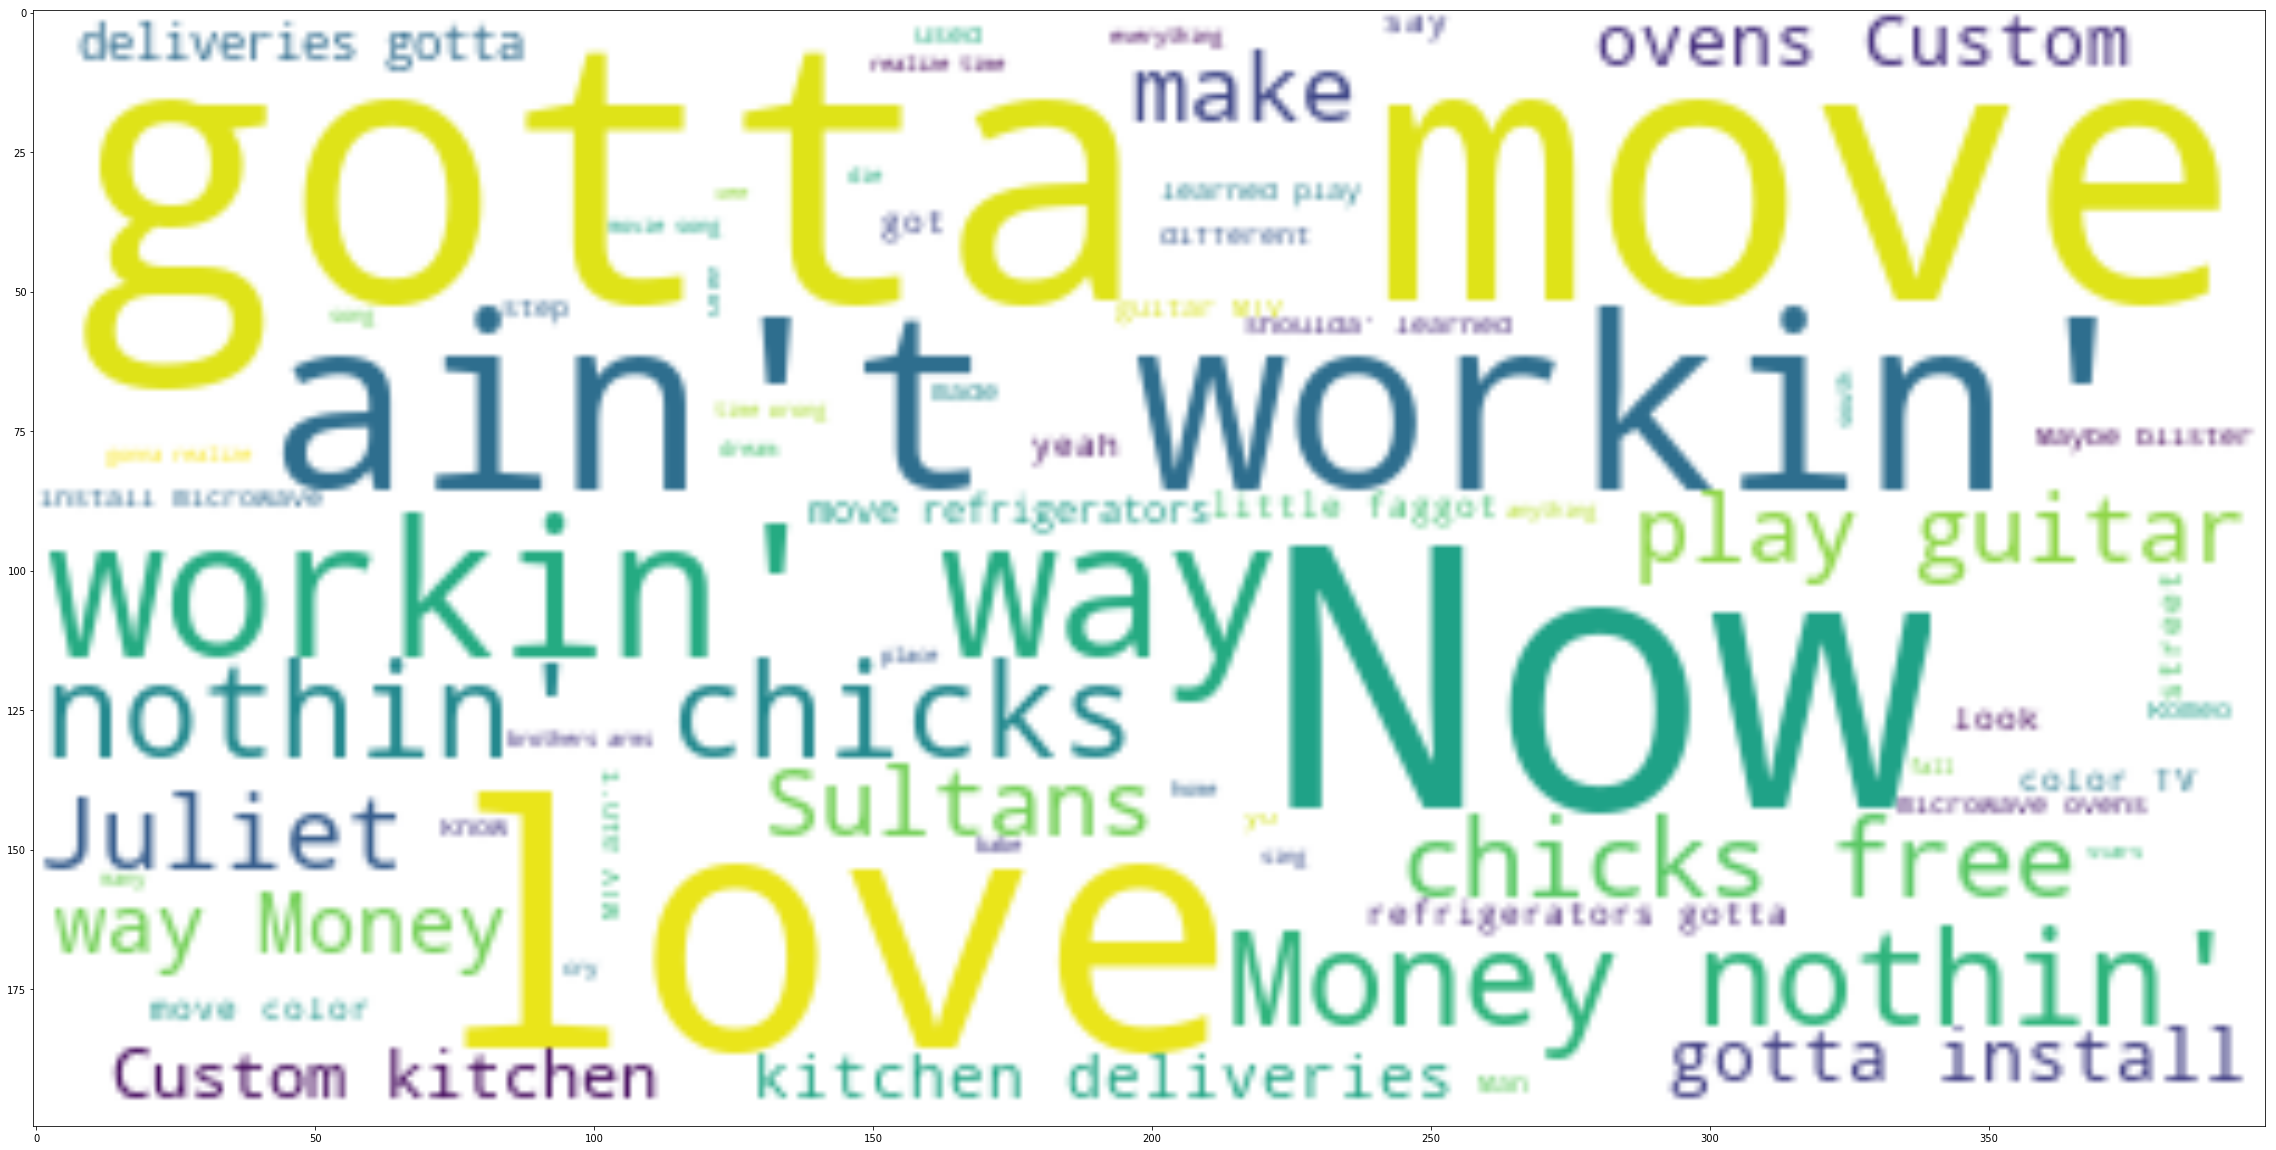

In [9]:
wordcloud2 = wordcloud.WordCloud(background_color="white", max_words=2000, contour_color='steelblue').generate(allWordsDireStraits)
plt.figure(num = None, figsize = (40,40))
plt.imshow(wordcloud2, interpolation='bilinear')

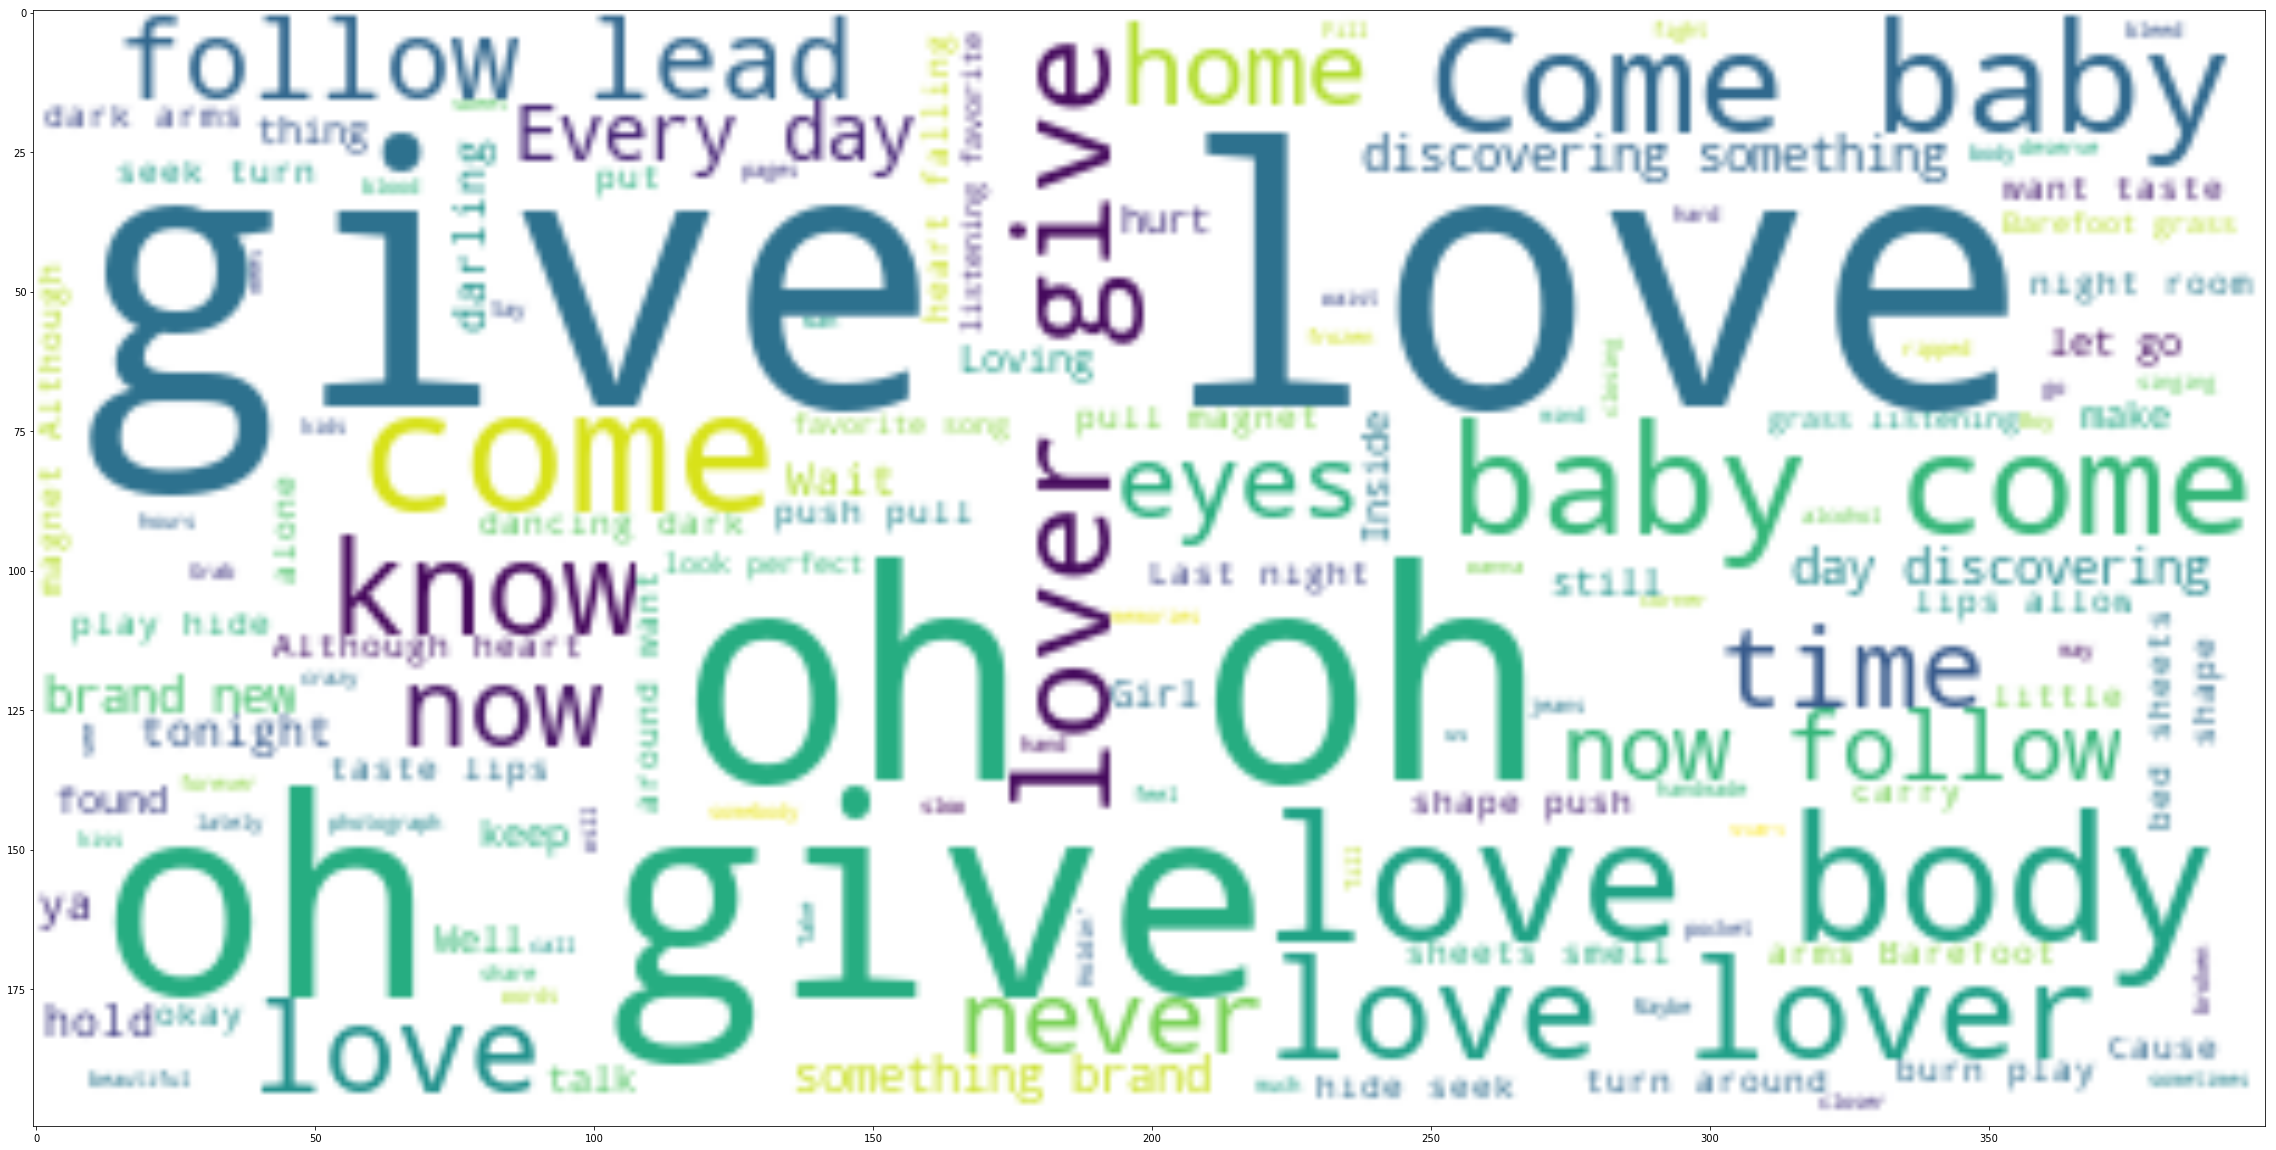

In [10]:
wordcloud3 = wordcloud.WordCloud(background_color="white", max_words=2000, contour_color='steelblue').generate(allWordsEdSheeran)
plt.figure(num = None, figsize = (40,40))
plt.imshow(wordcloud3, interpolation='bilinear')